# Lab week 7

## Task 1

### Question 1

#### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor  

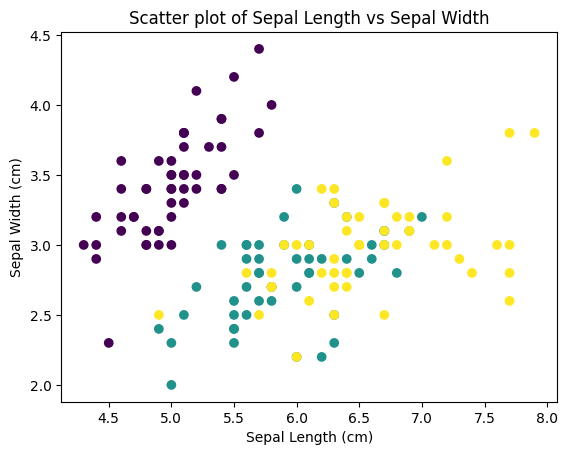

In [3]:
iris = datasets.load_iris()
housing = fetch_california_housing()


iris_data = pd.DataFrame(iris.data , columns=iris.feature_names)
iris_target_columns = iris.target_names
iris_target = iris.target
iris_data_null = iris_data.isnull()

plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], c=iris_target)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.show()

housing_data = pd.DataFrame(housing.data , columns=housing.feature_names)
hosuing_target_columns = housing.target_names
hosuing_target = housing.target
housing_data_null = housing_data.isnull()

### Question 2

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

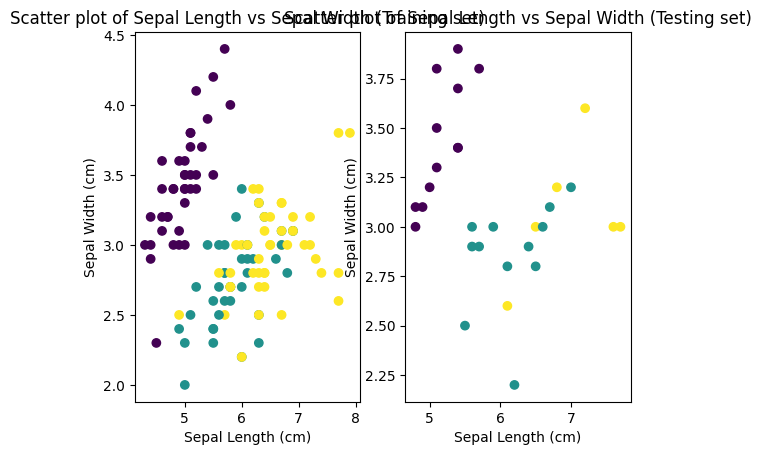

In [4]:
iris_scaler = StandardScaler()
iris_scaler.fit(iris_data)
print(iris_scaler.transform(iris_data))


housing_scaler = StandardScaler()
housing_scaler.fit(housing_data)
print(housing_scaler.transform(housing_data))


iris_train_X, iris_test_X , iris_train_Y, iris_test_Y  = train_test_split(iris_data , iris_target , random_state=104,  test_size=0.20,  shuffle=True)

fig, (train, test) = plt.subplots(1, 2)

train.scatter(iris_train_X['sepal length (cm)'], iris_train_X['sepal width (cm)'], c=iris_train_Y)
train.set_xlabel('Sepal Length (cm)')
train.set_ylabel('Sepal Width (cm)')
train.set_title('Scatter plot of Sepal Length vs Sepal Width (Training set)')


test.scatter(iris_test_X['sepal length (cm)'], iris_test_X['sepal width (cm)'], c=iris_test_Y)
test.set_xlabel('Sepal Length (cm)')
test.set_ylabel('Sepal Width (cm)')
test.set_title('Scatter plot of Sepal Length vs Sepal Width (Testing set)')


plt.show()

housing_train_X, housing_test_X ,housing_train_Y, housing_test_Y = train_test_split(housing_data , hosuing_target , random_state=104,  test_size=0.20,  shuffle=True)

## Task2

### Question 3

In [5]:
accuracy_list = []
precision_list = []
f1_list = []
recall_list = []

for i in range(1,16):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(iris_train_X , iris_train_Y)
    predicted = neigh.predict(iris_test_X)
    accuracy = metrics.accuracy_score(iris_test_Y, predicted)
    accuracy_list.append(accuracy)
    precision = metrics.precision_score(iris_test_Y, predicted, average='weighted')
    precision_list.append(precision)
    f1 = metrics.f1_score(iris_test_Y, predicted, average='weighted')
    f1_list.append(f1)
    
    recall = metrics.recall_score(iris_test_Y, predicted, average='weighted')
    recall_list.append(recall)
    print(f'For iteration {i} the accuracy is {accuracy}')

For iteration 1 the accuracy is 1.0
For iteration 2 the accuracy is 0.9666666666666667
For iteration 3 the accuracy is 1.0
For iteration 4 the accuracy is 1.0
For iteration 5 the accuracy is 1.0
For iteration 6 the accuracy is 1.0
For iteration 7 the accuracy is 1.0
For iteration 8 the accuracy is 1.0
For iteration 9 the accuracy is 1.0
For iteration 10 the accuracy is 1.0
For iteration 11 the accuracy is 1.0
For iteration 12 the accuracy is 1.0
For iteration 13 the accuracy is 1.0
For iteration 14 the accuracy is 1.0
For iteration 15 the accuracy is 1.0


### Question 4

In [6]:
linear = SVC(kernel='linear').fit(iris_train_X, iris_train_Y)
linear_predict = linear.predict(iris_test_X)
linear_accuracy = metrics.accuracy_score(iris_test_Y , linear_predict)
linear_precision = metrics.precision_score(iris_test_Y , linear_predict, average='weighted')
linear_f1 = metrics.f1_score(iris_test_Y , linear_predict, average='weighted')
linear_recall = metrics.recall_score(iris_test_Y , linear_predict, average='weighted')

poly = SVC(kernel='poly').fit(iris_train_X, iris_train_Y)
poly_predict = poly.predict(iris_test_X)
poly_accuracy = metrics.accuracy_score(iris_test_Y , poly_predict)
poly_precision = metrics.precision_score(iris_test_Y , poly_predict, average='weighted')
poly_f1 = metrics.f1_score(iris_test_Y , poly_predict, average='weighted')
poly_recall = metrics.recall_score(iris_test_Y , poly_predict, average='weighted')

rbf = SVC(kernel='rbf').fit(iris_train_X, iris_train_Y)
rbf_predict = rbf.predict(iris_test_X)
rbf_accuracy = metrics.accuracy_score(iris_test_Y , rbf_predict)
rbf_precision = metrics.precision_score(iris_test_Y , rbf_predict, average='weighted')
rbf_f1 = metrics.f1_score(iris_test_Y , rbf_predict, average='weighted')
rbf_recall = metrics.recall_score(iris_test_Y , rbf_predict, average='weighted')


svc_precision = [linear_precision , poly_accuracy , rbf_precision]
svc_f1 = [linear_f1 , poly_f1 , rbf_f1]
svc_recall = [linear_recall , poly_recall , rbf_recall]

### Question 5

In [7]:
calssifier_10 = RandomForestClassifier(n_estimators = 10).fit(iris_train_X, iris_train_Y)
predict_10 = calssifier_10.predict(iris_test_X)
acc_10 = metrics.accuracy_score(iris_test_Y , predict_10)
precision_10 = metrics.precision_score(iris_test_Y , predict_10, average='weighted')
f1_10 = metrics.f1_score(iris_test_Y , predict_10, average='weighted')
recall_10 =  metrics.recall_score(iris_test_Y , predict_10, average='weighted')
print(f'Accuracy for estimator 10 {acc_10}')

calssifier_50 = RandomForestClassifier(n_estimators = 50).fit(iris_train_X, iris_train_Y)
predict_50 = calssifier_50.predict(iris_test_X)
acc_50 = metrics.accuracy_score(iris_test_Y , predict_50)
precision_50 = metrics.precision_score(iris_test_Y , predict_50, average='weighted')
f1_50 = metrics.f1_score(iris_test_Y , predict_50, average='weighted')
recall_50 =  metrics.recall_score(iris_test_Y , predict_50, average='weighted')
print(f'Accuracy for estimator 50 {acc_50}')

calssifier_100 = RandomForestClassifier(n_estimators = 100).fit(iris_train_X, iris_train_Y)
predict_100 = calssifier_100.predict(iris_test_X)
acc_100 = metrics.accuracy_score(iris_test_Y , predict_100)
precision_100 = metrics.precision_score(iris_test_Y , predict_100, average='weighted')
f1_100 = metrics.f1_score(iris_test_Y , predict_100, average='weighted')
recall_100 =  metrics.recall_score(iris_test_Y , predict_100, average='weighted')
print(f'Accuracy for estimator 100 {acc_100}')


est_precision = [precision_10 , precision_50 , precision_100]
est_f1 = [f1_10 , f1_50 , f1_100]
est_recall = [recall_10,recall_50,recall_100]

Accuracy for estimator 10 0.9666666666666667
Accuracy for estimator 50 0.9666666666666667
Accuracy for estimator 100 1.0


## Task 3

### Question 6

In [8]:
regr = LinearRegression() 
  
regr.fit(housing_train_X, housing_train_Y)
pred = regr.predict(housing_test_X)

mean_square_error = mean_squared_error(housing_test_Y , pred)
r2_Score = r2_score(housing_test_Y,pred)

print(f'Mean square error = {mean_square_error}')
print(f'R2 acore = {r2_Score}')

Mean square error = 0.5459532712752869
R2 acore = 0.6093601131672092


### Question 7

In [9]:
regressor = DecisionTreeRegressor(random_state = 0)  

regressor.fit(housing_train_X, housing_train_Y)
tree_pred = regressor.predict(housing_test_X)

tree_mean_square_error = mean_squared_error(housing_test_Y , tree_pred)
tree_r2_Score = r2_score(housing_test_Y,tree_pred)
print(f'Mean square error = {tree_mean_square_error}')
print(f'R2 acore = {tree_r2_Score}')

Mean square error = 0.5487397943653343
R2 acore = 0.6073663032171188


## Task 4

### Question 8

#### Accuracy of Classification

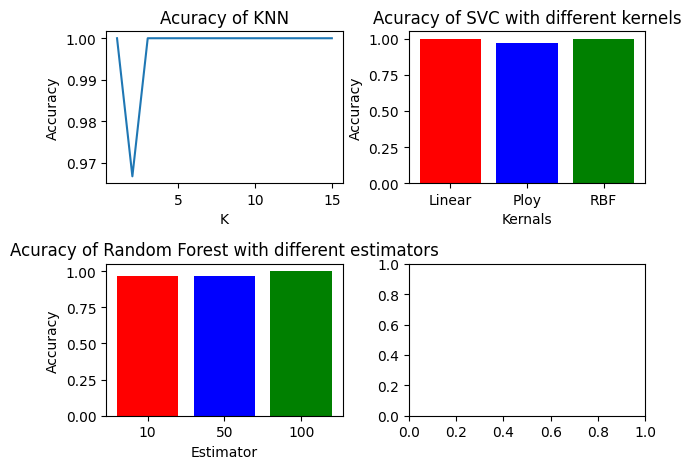

In [10]:
fig, axes = plt.subplots(2, 2) 

axes[0,0].plot([i for i in range(1,16)] , accuracy_list)
axes[0,0].set_xlabel('K')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].set_title('Acuracy of KNN')


kernals = ['Linear' , 'Ploy' , 'RBF']
svc_accuracy = [linear_accuracy , poly_accuracy , rbf_accuracy]
axes[0,1].bar(kernals , svc_accuracy , color=['Red' , 'Blue' , 'Green'])
axes[0,1].set_xlabel('Kernals')
axes[0,1].set_ylabel('Accuracy')
axes[0,1].set_title('Acuracy of SVC with different kernels')


estimator = ['10' , '50' , '100']
est_accuracy = [acc_10 , acc_50 , acc_100]
axes[1,0].bar(estimator , est_accuracy , color=['Red' , 'Blue' , 'Green'])
axes[1,0].set_xlabel('Estimator')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].set_title('Acuracy of Random Forest with different estimators')

plt.tight_layout()
plt.show()

#### Precision of Classification

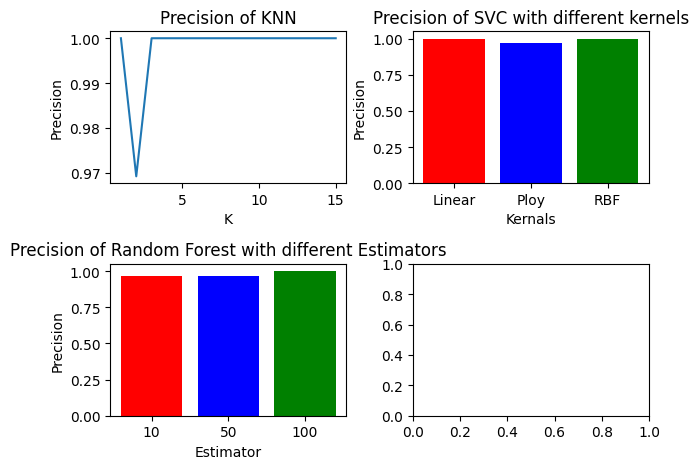

In [16]:
fig, axes = plt.subplots(2, 2) 

axes[0,0].plot([i for i in range(1,16)] , precision_list)
axes[0,0].set_xlabel('K')
axes[0,0].set_ylabel('Precision')
axes[0,0].set_title('Precision of KNN')




axes[0,1].bar(kernals , svc_precision , color=['Red' , 'Blue' , 'Green'])
axes[0,1].set_xlabel('Kernals')
axes[0,1].set_ylabel('Precision')
axes[0,1].set_title('Precision of SVC with different kernels')




axes[1,0].bar(estimator , est_precision , color=['Red' , 'Blue' , 'Green'])
axes[1,0].set_xlabel('Estimator')
axes[1,0].set_ylabel('Precision')
axes[1,0].set_title('Precision of Random Forest with different Estimators')

plt.tight_layout()
plt.show()

#### F1 Score of Classification

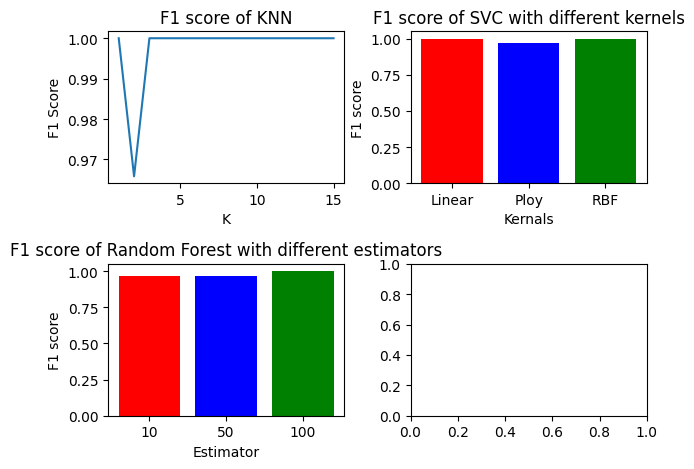

In [17]:
fig, axes = plt.subplots(2, 2) 

axes[0,0].plot([i for i in range(1,16)] , f1_list)
axes[0,0].set_xlabel('K')
axes[0,0].set_ylabel('F1 Score')
axes[0,0].set_title('F1 score of KNN')




axes[0,1].bar(kernals , svc_f1 , color=['Red' , 'Blue' , 'Green'])
axes[0,1].set_xlabel('Kernals')
axes[0,1].set_ylabel('F1 score')
axes[0,1].set_title('F1 score of SVC with different kernels')



axes[1,0].bar(estimator , est_f1 , color=['Red' , 'Blue' , 'Green'])
axes[1,0].set_xlabel('Estimator')
axes[1,0].set_ylabel('F1 score')
axes[1,0].set_title('F1 score of Random Forest with different estimators')

plt.tight_layout()
plt.show()

#### Recall score of Classification

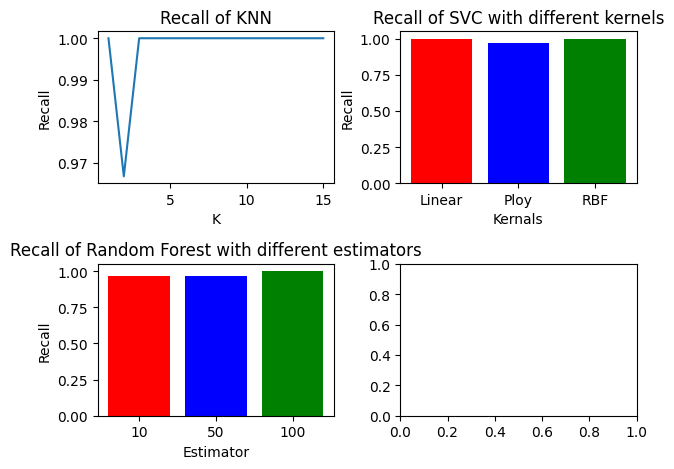

In [18]:
fig, axes = plt.subplots(2, 2) 

axes[0,0].plot([i for i in range(1,16)] , recall_list)
axes[0,0].set_xlabel('K')
axes[0,0].set_ylabel('Recall')
axes[0,0].set_title('Recall of KNN')




axes[0,1].bar(kernals , svc_recall , color=['Red' , 'Blue' , 'Green'])
axes[0,1].set_xlabel('Kernals')
axes[0,1].set_ylabel('Recall')
axes[0,1].set_title('Recall of SVC with different kernels')



axes[1,0].bar(estimator , est_recall , color=['Red' , 'Blue' , 'Green'])
axes[1,0].set_xlabel('Estimator')
axes[1,0].set_ylabel('Recall')
axes[1,0].set_title('Recall of Random Forest with different estimators')

plt.tight_layout()
plt.show()

### Question 9

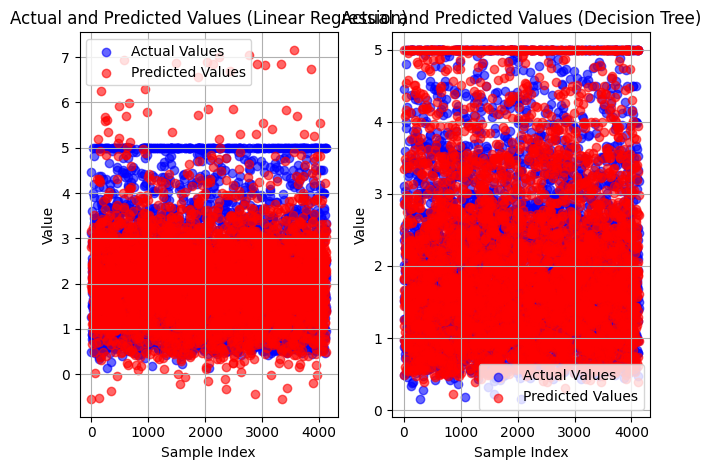

In [14]:
indices = range(len(housing_test_Y))


fig, axes = plt.subplots(1, 2)


axes[0].scatter(indices, housing_test_Y, color='blue', alpha=0.6, label='Actual Values')
axes[0].scatter(indices, pred, color='red', alpha=0.6, label='Predicted Values')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Value')
axes[0].set_title('Actual and Predicted Values (Linear Regression)')
axes[0].legend()
axes[0].grid()


regressor = DecisionTreeRegressor(random_state=0)  
regressor.fit(housing_train_X, housing_train_Y)  
tree_pred = regressor.predict(housing_test_X)


axes[1].scatter(indices, housing_test_Y, color='blue', alpha=0.6, label='Actual Values')
axes[1].scatter(indices, tree_pred, color='red', alpha=0.6, label='Predicted Values')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Value')
axes[1].set_title('Actual and Predicted Values (Decision Tree)')
axes[1].legend()
axes[1].grid()


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

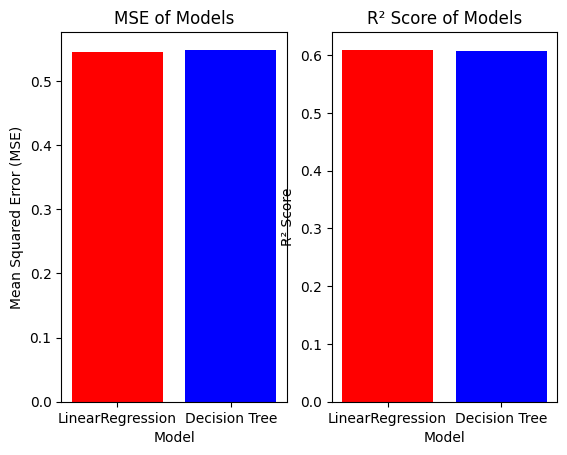

In [15]:
plt.tight_layout()
plt.show()


model = ['LinearRegression' , 'Decision Tree']
mse = [mean_square_error , tree_mean_square_error]
r2 = [r2_Score , tree_r2_Score]

fig, axes = plt.subplots(1, 2)


axes[0].bar(model, mse, color=['Red', 'Blue'])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Mean Squared Error (MSE)')
axes[0].set_title('MSE of Models')

# Plot R² Score
axes[1].bar(model, r2, color=['Red', 'Blue'])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R² Score')
axes[1].set_title('R² Score of Models')


plt.show()